In [1]:
import pandas as pd 

# Dependencies and boilerplate
from sqlalchemy import Column, Float, Integer, String
from sqlalchemy.ext.declarative import declarative_base
import matplotlib.pyplot as plt
% matplotlib inline

Base = declarative_base()

In [2]:
measurements = pd.read_csv("hawaii_measurements.csv")
stations = pd.read_csv("hawaii_stations.csv")

In [3]:
clean_measurements = measurements.dropna()

In [4]:
clean_stations = stations

In [5]:
# Define a Measurement and Station classes
### BEGIN SOLUTION
Base = declarative_base()

class Measurement(Base):
    __tablename__ = "Measurements"
    
    id = Column(Integer, primary_key=True)
    station = Column(String)
    date = Column(String)
    prcp = Column(Float) 
    tobs = Column(Integer) 
    
class Station(Base):
    __tablename__ = "Stations"
    
    id = Column(Integer, primary_key=True)
    station = Column(String)
    name = Column(String) 
    latitude = Column(Float) 
    longitude = Column(Float) 
    elevation = Column(Float) 
### END SOLUTION

In [6]:
# Use a Session to test the Measurement and Station classes
### BEGIN SOLUTION
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
engine = create_engine("sqlite:///hawaii.sqlite")
Base.metadata.create_all(engine)

metadata = sqlalchemy.schema.MetaData(bind=engine, reflect=True)
table = sqlalchemy.Table("Measurements", metadata, autoload=True)
session = Session(bind=engine)
conn = engine.connect()
clean_measurements = clean_measurements.to_dict(orient="records")
conn.execute(table.insert(),clean_measurements)

table = sqlalchemy.Table("Stations", metadata, autoload=True)
clean_stations = clean_stations.to_dict(orient="records")
conn.execute(table.insert(),clean_stations)
### END SOLUTION

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SADeprecationWarning: reflect=True is deprecate; please use the reflect() method.
  # Remove the CWD from sys.path while we load stuff.


In [7]:
# Use the Inspector to explore the database and print the table names
### BEGIN SOLUTION
inspector = inspect(engine)
inspector.get_table_names()
### END SOLUTION

['Measurements', 'Stations']

In [8]:
# Use Inspector to print the column names and types
### BEGIN SOLUTION
columns = inspector.get_columns('Measurements')
for c in columns:
    print(c['name'], c["type"])
### END SOLUTION

id INTEGER
station VARCHAR
date VARCHAR
prcp FLOAT
tobs INTEGER


In [9]:
# Use Inspector to print the column names and types
### BEGIN SOLUTION
columns = inspector.get_columns('Stations')
for c in columns:
    print(c['name'], c["type"])
### END SOLUTION

id INTEGER
station VARCHAR
name VARCHAR
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# Use `engine.execute` to select and display the rows from the Measurements table
### BEGIN SOLUTION
engine.execute('SELECT * FROM Measurements').fetchall()
### END SOLUTION

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-07', 0.06, 70),
 (6, 'USC00519397', '2010-01-08', 0.0, 64),
 (7, 'USC00519397', '2010-01-09', 0.0, 68),
 (8, 'USC00519397', '2010-01-10', 0.0, 73),
 (9, 'USC00519397', '2010-01-11', 0.01, 64),
 (10, 'USC00519397', '2010-01-12', 0.0, 61),
 (11, 'USC00519397', '2010-01-14', 0.0, 66),
 (12, 'USC00519397', '2010-01-15', 0.0, 65),
 (13, 'USC00519397', '2010-01-16', 0.0, 68),
 (14, 'USC00519397', '2010-01-17', 0.0, 64),
 (15, 'USC00519397', '2010-01-18', 0.0, 72),
 (16, 'USC00519397', '2010-01-19', 0.0, 66),
 (17, 'USC00519397', '2010-01-20', 0.0, 66),
 (18, 'USC00519397', '2010-01-21', 0.0, 69),
 (19, 'USC00519397', '2010-01-22', 0.0, 67),
 (20, 'USC00519397', '2010-01-23', 0.0, 67),
 (21, 'USC00519397', '2010-01-24', 0.01, 71),
 (22, 'USC00519397', '2010-01-25', 0.0, 67),
 (23, 'USC00519

In [11]:
# Use `engine.execute` to select and display the rows from the Measurements table
### BEGIN SOLUTION
engine.execute('SELECT * FROM Stations').fetchall()
### END SOLUTION

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4),
 (10, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (11, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (12, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (13, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 

In [12]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurements = Base.classes.Measurements
Stations = Base.classes.Stations

In [13]:
# Start a session to query the database
session = Session(engine)

In [14]:
# Query Measurements for 'date' & 'prcp'into results
### BEGIN SOLUTION
results = session.query(Measurements.date, func.avg(Measurements.prcp).label("Average_Percipitation")).filter(Measurements.date.between('2016-08-23', '2017-08-23')).\
    group_by(Measurements.date)
results
### END SOLUTION

In [15]:
#Load the query results into a Pandas DataFrame and set the index to the date column.
df = pd.read_sql(results.statement, session.bind)
df

,date,Average_Percipitation
0,2016-08-23,0.451667
1,2016-08-24,1.555000
2,2016-08-25,0.077143
3,2016-08-26,0.016667
4,2016-08-27,0.064000
5,2016-08-28,0.516667
6,2016-08-29,0.243333
7,2016-08-30,0.011667
8,2016-08-31,0.636000
9,2016-09-01,0.006000


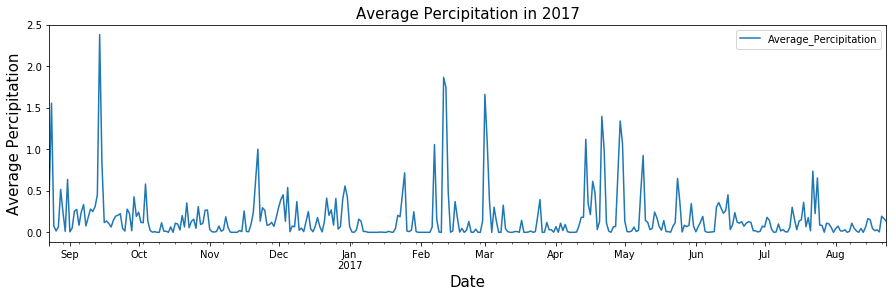

In [16]:
# Unpack the `date` and `average percipitation` from results and save into separate lists
### BEGIN SOLUTION
df["date"]=pd.to_datetime(df["date"])

df.plot(x= "date", y= "Average_Percipitation", figsize=(15,4))
plt.ylabel("Average Percipitation", fontsize = 15)
plt.xlabel("Date", fontsize = 15)
    #plt.xlim('2017-01-01', top15.iloc[0,0])
plt.title("Average Percipitation in 2017", fontsize = 15)
### END SOLUTION

In [17]:
print(round(df.describe(),2))  

       Average_Percipitation
count                 366.00
mean                    0.17
std                     0.30
min                     0.00
25%                     0.01
50%                     0.07
75%                     0.19
max                     2.38


In [18]:
### BEGIN SOLUTION

#Design a query to calculate the total number of stations.
total_stations = session.query(Stations.station).distinct().count()
print(total_stations)

#Design a query to find the most active stations.
#List the stations and observation counts in descending order
active_stations = session.query(Measurements.station,func.count(Measurements.station).label("Frequency")).group_by(Measurements.station)\
.order_by(func.count(Measurements.station).desc())
active_stations = pd.read_sql(active_stations.statement, session.bind)
active_stations
#Which station has the highest number of observations?
active_stations.iloc[0,:] 

9


station      USC00519281
Frequency          38808
Name: 0, dtype: object

In [19]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
tobs_12 = session.query(Measurements.date, func.avg(Measurements.tobs).label("Average_Temperature")).filter(Measurements.date.between('2016-08-23', '2017-08-23')).\
    group_by(Measurements.date)
tobs_12

In [20]:
avg_temp_df = pd.read_sql(tobs_12.statement, session.bind)
avg_temp_df = round(avg_temp_df,2)
avg_temp_df.describe()

,Average_Temperature
count,366.000000
mean,74.581913
std,3.735686
min,61.500000
25%,72.170000
50%,75.450000
75%,77.475000
max,82.000000


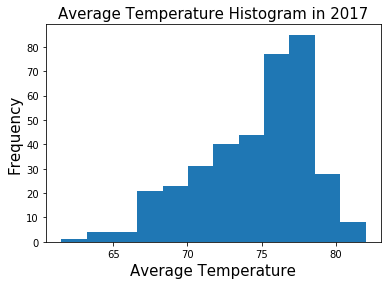

In [21]:
#Filter by the station with the highest number of observations.
#Plot the results as a histogram with bins=12.
avg_temp_df.hist("Average_Temperature",bins=12, grid=False)
plt.ylabel("Frequency", fontsize = 15)
plt.xlabel("Average Temperature", fontsize = 15)
plt.title("Average Temperature Histogram in 2017", fontsize = 15)

In [22]:
#Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.
def calc_temps(start_date, end_date):
    session = Session(engine)
    tobs_12 = session.query(Measurements.date, func.avg(Measurements.tobs).label("Average_Temperature")).filter(Measurements.date.between(start_date, end_date)).\
    group_by(Measurements.date)
    temps_df = pd.read_sql(tobs_12.statement, session.bind)
    avg_temp = avg_temp_df["Average_Temperature"].mean()
    max_temp = avg_temp_df["Average_Temperature"].max()
    min_temp = avg_temp_df["Average_Temperature"].min()
    print("Minimum Temperature: "+str(min_temp),
          "\nMaximum Temperature "+str(max_temp),
          "\nAverage Temperature "+str(round(avg_temp,2)))
    return min_temp, max_temp, avg_temp  


In [23]:
calc_temps("2017-07-31", "2017-08-23")

Minimum Temperature: 61.5 
Maximum Temperature 82.0 
Average Temperature 74.58


(61.5, 82.0, 74.581912568306)

In [24]:
temp_val = calc_temps("2017-07-31", "2017-08-23")

Minimum Temperature: 61.5 
Maximum Temperature 82.0 
Average Temperature 74.58


<Container object of 3 artists>

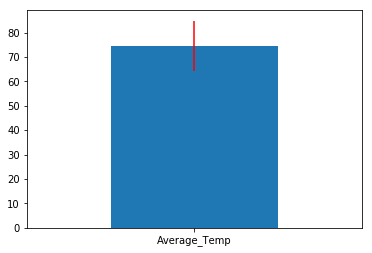

In [25]:
plt.bar(0, temp_val[2], width=1, tick_label=['Average_Temp'])
plt.xlim(-1,1)
plt.errorbar(0, temp_val[2], yerr= (temp_val[1]-temp_val[0])/2, color="r")

In [ ]:
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from flask import Flask, jsonify
import os
engine = create_engine("sqlite:///hawaii.sqlite")
session = Session(engine)
#################################################
# Flask Setup
#################################################
app = Flask(__name__)
#################################################
# Flask Routes
#################################################

@app.route("/")
def welcome():
    """List all available api routes."""
    return ("Available Routes:<br/> \
            /api/v1.0/precipitation<br/> \
            /api/v1.0/tobs<br/> \
            /api/v1.0/stations")

#Query for the dates and temperature observations from the last year.
#Convert the query results to a Dictionary using date as the key and tobs as the value.
#Return the json representation of your dictionary.
#Return a json list of stations from the dataset.
#Return a json list of Temperature Observations (tobs) for the previous year
#Return a json list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
#When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater than and equal to the start date.
#When given the start and the end date, calculate the TMIN, TAVG, and TMAX for dates between the start and end date inclusive.

@app.route("/api/v1.0/precipitation")
def precipitation():
    precipitation_data = []
    results = session.query(Measurements.date, func.avg(Measurements.prcp).label("Average_Percipitation")).filter(Measurements.date.between('2016-08-23', '2017-08-23')).\
    group_by(Measurements.date).all()
    for precipitation in results:
        precipitation_dict = {}
        precipitation_dict[precipitation.date] = precipitation.Average_Percipitation
        precipitation_data.append(precipitation_dict)
    return jsonify(precipitation_data)
#Return a json list of stations from the dataset.
@app.route("/api/v1.0/stations")
def stations():
    results = session.query(Stations.station).distinct().all()
    station_data = [record.station for record in results]
    return jsonify(station_data) 
@app.route("/api/v1.0/tobs")
def tobs():
    results = session.query(Measurements.date, func.avg(Measurements.tobs).label("Average_Temperature")).filter(Measurements.date.between('2016-08-23', '2017-08-23')).\
    group_by(Measurements.tobs).all()
    tobs_data = [record.Average_Temperature for record in results]
    return tobs_data 

   
if __name__ == '__main__':
    app.run(debug=True) 